### Install Python 3.10.8 because Colab is a boomer

In [1]:
!python --version

Python 3.10.8


### Install and import a bunch of libraries and modules

<html>
<ol>
<li>PyTorch and submodules (Python machine learning library)</li>
<li>PyTorch Geometric (machine learning library for graph-based learning)</li>
<li>Matplotlib (drawing and plotting library)</li>
<li>NetworkX (Python data science/network/graph library)</li>
</ol>

In [2]:
import torch
import torch.nn as nn
from torch_geometric import *

In [3]:
from torch_geometric.datasets import QM9, ZINC, MoleculeNet

In [4]:
from torch_geometric.data import *

In [5]:
from torch_geometric.utils.convert import to_networkx

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

In [7]:
from torch_geometric.transforms import NormalizeFeatures

In [8]:
import scipy
import scipy.io

### The QM9 Dataset
Loads the QM9 Dataset -- a datset with 134K organic molecules -- from the PyTorch Geometric `datasets` submodule.  
This dataset contains all the molecules represented in a graphical format, where atoms are vertices and edges are bonds between atoms.

Problem: cannot download the QM9 dataset it seems, everything else is working perfectly

In [9]:
dataset = QM9('', transform=None, pre_transform=None, pre_filter=None)

⬇️ Function that gets information about a molecule from the dataset

In [10]:
def get_info(idx: int):
    data = dataset[idx]
    print(f'Number of nodes: {data.num_nodes}')
    print(f'Number of edges: {data.num_edges}')
    print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
    print(f'Has isolated nodes: {data.has_isolated_nodes()}')
    print(f'Has self-loops: {data.has_self_loops()}')
    print(f'Is undirected: {data.is_undirected()}')
    return data

⬇️ Function that prints the data associated with the molecule

In [11]:
def mol_info(data):
    for prop in data: print(prop)

⬇️ Function that draws the graphical representation of the molecule

In [12]:
def draw_mol(data):
    vis = to_networkx(data)
    plt.figure(1, figsize=(8,8))
    nx.draw(vis)
    plt.show()

Create a **Dataset Loader** class for O.O.P purposes

In [13]:
class DatasetLoader:
    def __init__(self):
        self.dataset = dataset
        self.name = "Dataset Loader"

    def get_info(self, idx: int):
        data = self.dataset[idx]
        print(f'Number of nodes: {data.num_nodes}')
        print(f'Number of edges: {data.num_edges}')
        print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
        print(f'Has isolated nodes: {data.has_isolated_nodes()}')
        print(f'Has self-loops: {data.has_self_loops()}')
        print(f'Is undirected: {data.is_undirected()}')
        
    def mol_info(self, data):
        for prop in data: print(prop)

    def draw_mol(self, data):
        vis = to_networkx(data)
        plt.figure(1, figsize=(8,8))
        nx.draw(vis)
        plt.show()

    def __len__(self) -> int:
        return len(self.dataset) #13081

    def __getitem__(self, idx, verbose=False, draw=False):
        if verbose:
            self.get_info(idx)
            print()
        data = self.dataset[idx]
        self.mol_info(data)
        if draw:
            print()
            self.draw_mol(data)
        return data

In [14]:
DL = DatasetLoader()

('x', tensor([[0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 4.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]))
('edge_index', tensor([[0, 0, 0, 0, 1, 2, 3, 4],
        [1, 2, 3, 4, 0, 0, 0, 0]]))
('edge_attr', tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]]))
('y', tensor([[    0.0000,    13.2100,   -10.5499,     3.1865,    13.7363,    35.3641,
             1.2177, -1101.4878, -1101.4098, -1101.3840, -1102.0229,     6.4690,
           -17.1722,   -17.2868,   -17.3897,   -16.1519,   157.7118,   157.7100,
           157.7070]]))
('pos', tensor([[-1.2700e-02,  1.0858e+00,  8.0000e-03],
        [ 2.2000e-03, -6.0000e-03,  2.0000e-03],
        [ 1.0117e+00,  1.4638e+00,

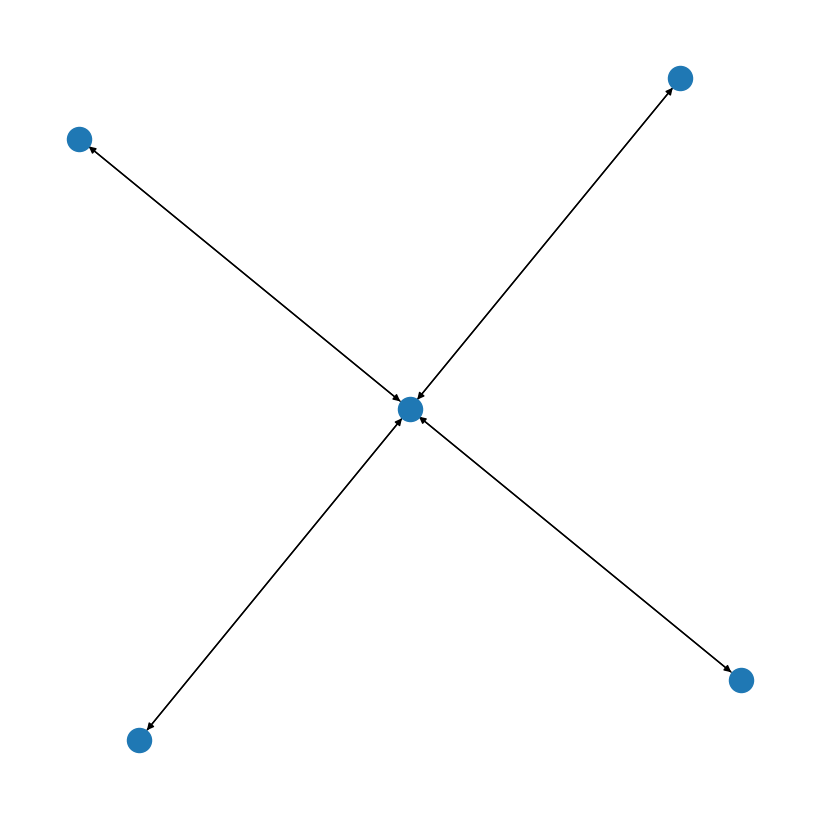

Data(x=[5, 11], edge_index=[2, 8], edge_attr=[8, 4], y=[1, 19], pos=[5, 3], z=[5], name='gdb_1', idx=[1])

In [15]:
DL.__getitem__(0, verbose=False, draw=True)

### Get the NetGAN model

Clone the repository; using original NetGAN

Better way to access models:

In [20]:
import sys
#sys.path.insert(1, '../../netgan_pytorch/netgan')
sys.path.insert(1, 'netgan_pytorch/netgan')

In [21]:
from models import *

In [22]:
from utils import *

In [23]:
from training import *

### Convert PyG data to Scipy Sparse Matrix

In [24]:
def pyg_to_ssm(idx: int, v: bool=False, d: bool=False):
    sample = DL.__getitem__(idx, verbose=v, draw=d)
    sample = to_networkx(sample)
    sample_mat = nx.to_scipy_sparse_matrix(sample)
    return sample, sample_mat

In [25]:
ch4, methane = pyg_to_ssm(0)

('x', tensor([[0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 4.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]))
('edge_index', tensor([[0, 0, 0, 0, 1, 2, 3, 4],
        [1, 2, 3, 4, 0, 0, 0, 0]]))
('edge_attr', tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]]))
('y', tensor([[    0.0000,    13.2100,   -10.5499,     3.1865,    13.7363,    35.3641,
             1.2177, -1101.4878, -1101.4098, -1101.3840, -1102.0229,     6.4690,
           -17.1722,   -17.2868,   -17.3897,   -16.1519,   157.7118,   157.7100,
           157.7070]]))
('pos', tensor([[-1.2700e-02,  1.0858e+00,  8.0000e-03],
        [ 2.2000e-03, -6.0000e-03,  2.0000e-03],
        [ 1.0117e+00,  1.4638e+00,

/var/folders/60/yjm0dhb14rx345qp3gt455mw0000gn/T/ipykernel_40801/3298640954.py:4: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  sample_mat = nx.to_scipy_sparse_matrix(sample)


In [26]:
torch_geometric.utils.convert.from_networkx(ch4)

Data(edge_index=[2, 8], num_nodes=5)

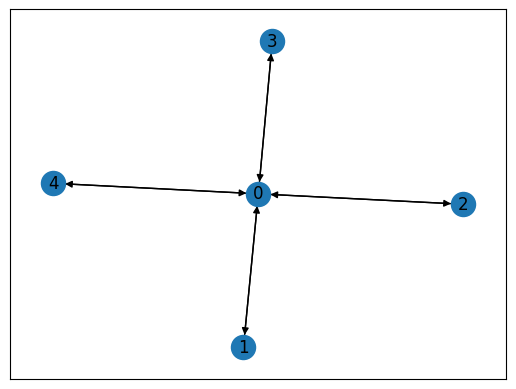

In [27]:
nx.draw_networkx(ch4, pos=None, arrows=None, with_labels=True)

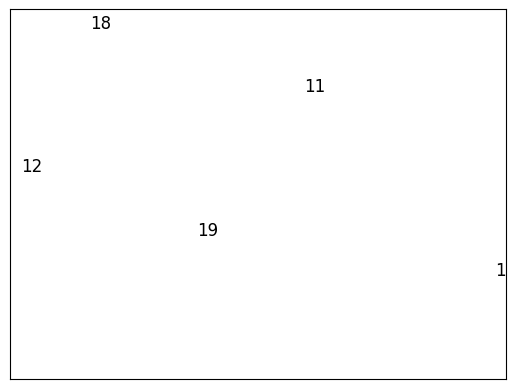

In [28]:
G = nx.dodecahedral_graph()
labels = nx.draw_networkx_labels(G, pos=nx.spring_layout(G))

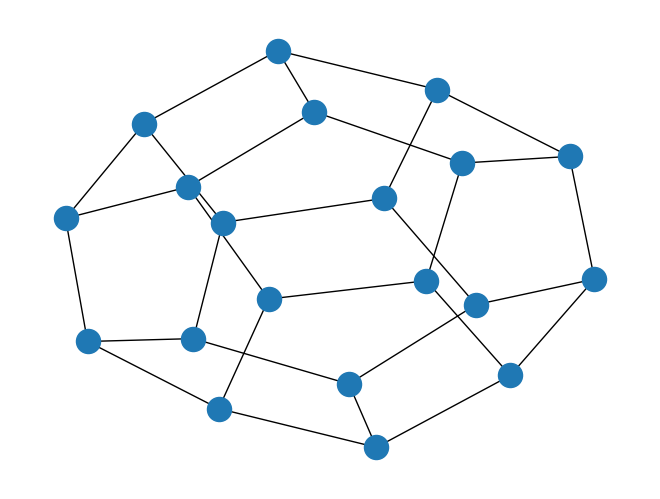

In [29]:
nx.draw(G)

In [30]:
nx.spring_layout(G)

{0: array([-0.40323272, -0.95336562]),
 1: array([ 0.22442472, -0.93723878]),
 2: array([ 0.33526777, -0.36714263]),
 3: array([-0.23715706, -0.09680811]),
 4: array([-0.17283788,  0.54776202]),
 5: array([0.41459535, 0.62168526]),
 6: array([0.71955628, 0.0864321 ]),
 7: array([ 1.        , -0.14757797]),
 8: array([ 0.68752306, -0.69497127]),
 9: array([ 0.16503496, -0.54049582]),
 10: array([-0.41702615, -0.62053114]),
 11: array([-0.71762006, -0.08678199]),
 12: array([-0.33217472,  0.36545275]),
 13: array([0.24470304, 0.10126155]),
 14: array([0.75876934, 0.42821151]),
 15: array([0.40062592, 0.95315438]),
 16: array([-0.22909833,  0.93264244]),
 17: array([-0.69236508,  0.69367631]),
 18: array([-0.99954384,  0.14032242]),
 19: array([-0.74944461, -0.42568741])}

In [31]:
not_ch4, not_methane = pyg_to_ssm(18456)

('x', tensor([[0., 0., 0., 1., 0., 8., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 8., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 2.],
        [0., 0., 1., 0., 0., 7., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 6., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]]))
('edge_index', tensor([[ 0,  1,  1,  1,  2,  2,  2,  2,  3,  3,  4,  4,  4,  4,  5,  5,  5,  5,
          6,  6,  6,  7,  7,  7,  7,  8,  9, 10, 11, 12],
        [ 1,  0,  2,  6,  1,  3,  7,  8,  2,  4,  3,  5,  7,  9,  4,  6, 10, 11,
          1,  5,  7,  2,  4,  6, 12,  2,  4,  5,  5,  7

/var/folders/60/yjm0dhb14rx345qp3gt455mw0000gn/T/ipykernel_40801/3298640954.py:4: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  sample_mat = nx.to_scipy_sparse_matrix(sample)


In [32]:
print(not_ch4)

DiGraph with 13 nodes and 30 edges


In [33]:
print(not_methane)

  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (1, 6)	1
  (2, 1)	1
  (2, 3)	1
  (2, 7)	1
  (2, 8)	1
  (3, 2)	1
  (3, 4)	1
  (4, 3)	1
  (4, 5)	1
  (4, 7)	1
  (4, 9)	1
  (5, 4)	1
  (5, 6)	1
  (5, 10)	1
  (5, 11)	1
  (6, 1)	1
  (6, 5)	1
  (6, 7)	1
  (7, 2)	1
  (7, 4)	1
  (7, 6)	1
  (7, 12)	1
  (8, 2)	1
  (9, 4)	1
  (10, 5)	1
  (11, 5)	1
  (12, 7)	1


### Now, let's try running NetGAN on a very small sample of the QM9 Dataset

In [34]:
import io

In [35]:
graph = nx.to_numpy_array(not_ch4)

In [36]:
graph

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [37]:
temp = nx.from_numpy_array(graph)

In [38]:
temp

In [39]:
graph[graph!=0] = 1.0
graph_nx = nx.from_numpy_array(graph)
graph_sparse = scipy.sparse.csr_matrix(graph)
n_edges = graph.sum()

In [40]:
print(f"This graph has {n_edges} edges!")

This graph has 30.0 edges!


In [41]:
graph_sparse

<13x13 sparse matrix of type '<class 'numpy.float64'>'
	with 30 stored elements in Compressed Sparse Row format>

In [42]:
not_graph_sparse = scipy.sparse.tril(graph_sparse).tocsr()

In [43]:
mst = scipy.sparse.csgraph.minimum_spanning_tree(not_graph_sparse)

In [44]:
mst[mst > 1] = 1
mst.eliminate_zeros()
ihatethis = not_graph_sparse - mst

In [45]:
print(ihatethis)

  (6, 5)	1.0
  (7, 4)	1.0
  (7, 6)	1.0


In [46]:
trainer = Trainer(graph_sparse, len(graph), set_ops=False)

  (0, 1)	1.0
  (1, 0)	1.0
  (1, 2)	1.0
  (1, 6)	1.0
  (2, 1)	1.0
  (2, 3)	1.0
  (2, 7)	1.0
  (2, 8)	1.0
  (3, 2)	1.0
  (3, 4)	1.0
  (4, 3)	1.0
  (4, 5)	1.0
  (4, 7)	1.0
  (4, 9)	1.0
  (5, 4)	1.0
  (5, 6)	1.0
  (5, 10)	1.0
  (5, 11)	1.0
  (6, 1)	1.0
  (6, 5)	1.0
  (6, 7)	1.0
  (7, 2)	1.0
  (7, 4)	1.0
  (7, 6)	1.0
  (7, 12)	1.0
  (8, 2)	1.0
  (9, 4)	1.0
  (10, 5)	1.0
  (11, 5)	1.0
  (12, 7)	1.0
This graph is connected
idx_ones looks like [0 1 2]
s_train is equal to 0
test_ones looks like [[6 5]
 [7 4]
 [7 6]]
N_test is 3.
test_zeros looks like [[ 7  0]
 [10  6]
 [ 9  1]] with length 3.


**** Using VAL criterion for early stopping with max patience of: 5****
iteration: 1      critic: -0.185982      gen -0.083508
iteration: 11      critic: -0.411518      gen -0.099493
iteration: 21      critic: -0.593332      gen -0.024395
iteration: 31      critic: -0.705991      gen 0.018815
iteration: 41      critic: -0.796193      gen 0.017483
iteration: 51      critic: -0.793458      gen -0.021662
iteration: 61      critic: -0.857324      gen 0.083430
iteration: 71      critic: -1.067303      gen 0.169429
iteration: 81      critic: -1.203489      gen 0.394064
iteration: 91      critic: -1.295095      gen 0.452688
1
samples:[[ 2  3 12 11  2 11  9  2  2  8  2 11  8  5  0  4]
 [ 1  1  9  8  1  7 12  4  7  2 10 11  2  4  7  1]]
roc: 0.7500   avp: 0.7500   eo: 0.2000
Took 0.762042252222697 minutes so far..


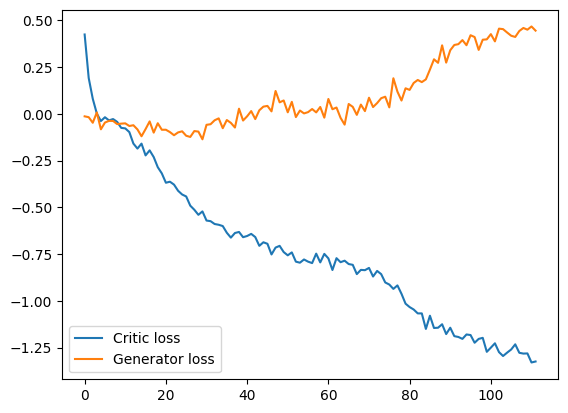

iteration: 101      critic: -1.318916      gen 0.420716
iteration: 111      critic: -1.322636      gen 0.394647
iteration: 121      critic: -1.396118      gen 0.415289
iteration: 131      critic: -1.450788      gen 0.379547
iteration: 141      critic: -1.478600      gen 0.430073
iteration: 151      critic: -1.538309      gen 0.448473
iteration: 161      critic: -1.588161      gen 0.391153
iteration: 171      critic: -1.630142      gen 0.459539
iteration: 181      critic: -1.617305      gen 0.418836
iteration: 191      critic: -1.680236      gen 0.447314
1
samples:[[ 4 11  7  8  2  0  2  7  5  1 11 11 10  1  3  2]
 [ 8  4  8  3  7  8  9 11  1  3  0  5  7 10  5  5]]
roc: 0.5000   avp: 0.5000   eo: 0.2000
Took 1.5518337527910868 minutes so far..


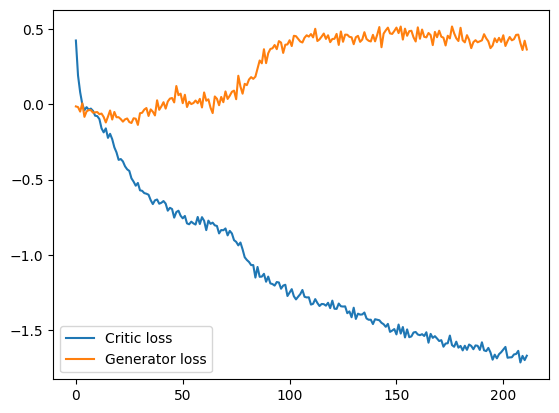

iteration: 201      critic: -1.683109      gen 0.367434
iteration: 211      critic: -1.720621      gen 0.425202
iteration: 221      critic: -1.692063      gen 0.320471
iteration: 231      critic: -1.592226      gen 0.349564
iteration: 241      critic: -1.670741      gen 0.317537
iteration: 251      critic: -1.627628      gen 0.306550
iteration: 261      critic: -1.642725      gen 0.285117
iteration: 271      critic: -1.595326      gen 0.257068
iteration: 281      critic: -1.560042      gen 0.251225
iteration: 291      critic: -1.550403      gen 0.240863
1
samples:[[ 0  2  1  7  1  2  1  1  2  6  1  6  2  7  1  0]
 [ 8 11  1  7  6  2  0  6  2  0 12  8  8  2  1  3]]
roc: 0.5000   avp: 0.5000   eo: 0.4000
Took 2.322450315952301 minutes so far..


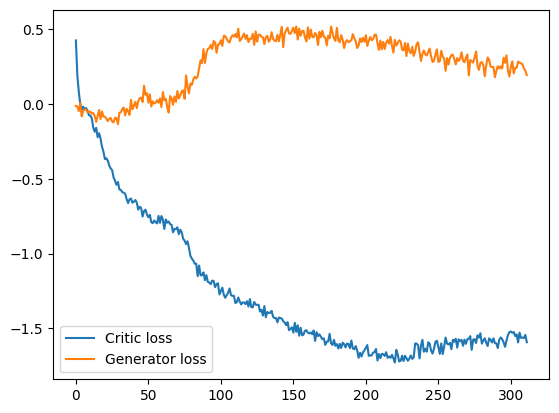

iteration: 301      critic: -1.582376      gen 0.334896
iteration: 311      critic: -1.553071      gen 0.307712
iteration: 321      critic: -1.599484      gen 0.300308
iteration: 331      critic: -1.600234      gen 0.286105
iteration: 341      critic: -1.549850      gen 0.264221
iteration: 351      critic: -1.587786      gen 0.239225
iteration: 361      critic: -1.645763      gen 0.225870
iteration: 371      critic: -1.555616      gen 0.218013
iteration: 381      critic: -1.606320      gen 0.259793
iteration: 391      critic: -1.584259      gen 0.263857
1
samples:[[ 4  4  3  2  5  2  3  2  4 12  1  2  2  8  6  2]
 [ 7  1  2  2  8  2  3  4  3 12  3  2 12  5  2  5]]


ValueError: Fewer non-zero entries in p than size

In [49]:
trainer.train(create_graph_every=100, plot_graph_every=100, num_samples_graph=1000, stopping_criterion='val')

1
11
21
31
41


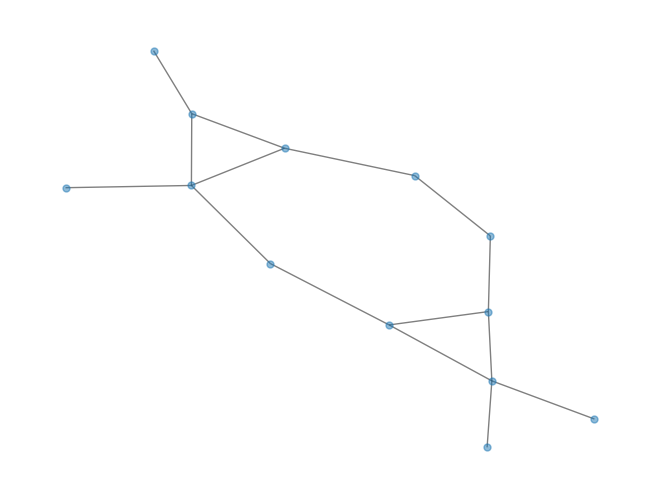

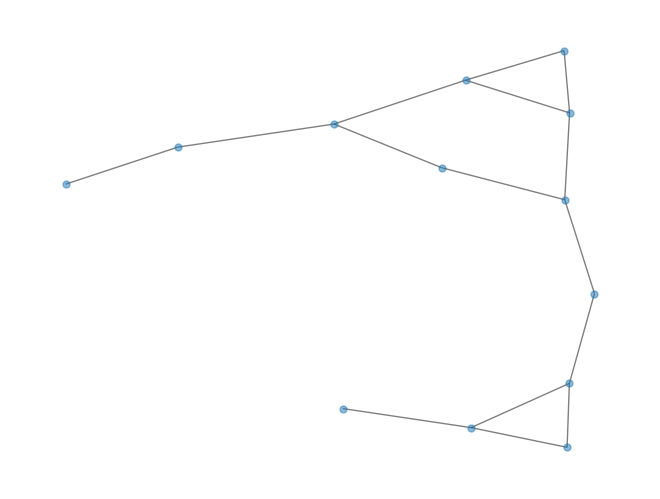

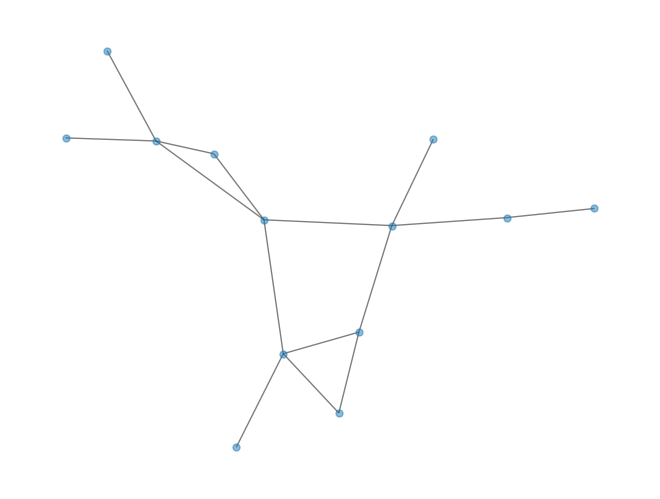

In [50]:
trans_mat = trainer.create_transition_matrix(50000)
graph_synthetic = []
for i in range(3):
    graph_sampled = graph_from_scores(trans_mat, n_edges)
    graph_synthetic.append(graph_sampled)
    graph_nx_sampled = nx.from_numpy_array(graph_sampled)
    nx.draw(graph_nx_sampled, node_size=25, alpha=0.5)
    plt.show()

In [51]:
temp = nx.from_numpy_array(graph_synthetic[0])

In [52]:
temp

In [53]:
temp_m = nx.to_scipy_sparse_matrix(temp)

/var/folders/60/yjm0dhb14rx345qp3gt455mw0000gn/T/ipykernel_40801/1836056761.py:1: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  temp_m = nx.to_scipy_sparse_matrix(temp)


In [54]:
temp_m

<13x13 sparse matrix of type '<class 'numpy.float64'>'
	with 30 stored elements in Compressed Sparse Row format>

In [55]:
print(temp)

Graph with 13 nodes and 15 edges


In [56]:
not_methane

<13x13 sparse matrix of type '<class 'numpy.int64'>'
	with 30 stored elements in Compressed Sparse Row format>

In [57]:
temp = nx.from_numpy_array(graph_synthetic[0])
grass = torch_geometric.utils.convert.from_networkx(temp)

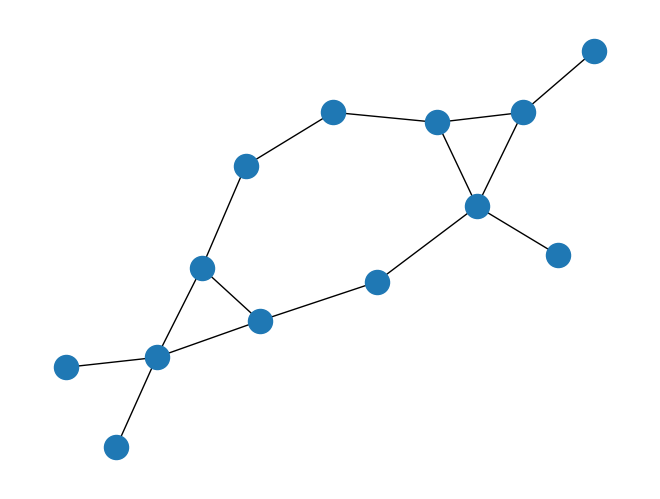

In [58]:
nx.draw(temp)

In [59]:
grass

Data(edge_index=[2, 30], weight=[30], num_nodes=13)

In [60]:
atom_labels = {}

In [61]:
temp[5]

AtlasView({3: {'weight': 1.0}, 11: {'weight': 1.0}})

In [62]:
temp.degree()

DegreeView({0: 1, 1: 4, 2: 3, 3: 3, 4: 4, 5: 2, 6: 1, 7: 1, 8: 3, 9: 2, 10: 1, 11: 2, 12: 3})

In [63]:
G.edges()

EdgeView([(0, 1), (0, 19), (0, 10), (1, 2), (1, 8), (2, 3), (2, 6), (3, 4), (3, 19), (4, 5), (4, 17), (5, 6), (5, 15), (6, 7), (7, 8), (7, 14), (8, 9), (9, 10), (9, 13), (10, 11), (11, 12), (11, 18), (12, 13), (12, 16), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19)])

In [64]:
valence = {
    1 : "H", #Hydrogen
    2 : "O", #Oxygen
    3 : "N", #Nitrogen
    4 : "C" #Carbon
}
valence

{1: 'H', 2: 'O', 3: 'N', 4: 'C'}

In [65]:
for vertex, degree in temp.degree():
    atom_labels[vertex] = valence[degree]

In [66]:
atom_labels

{0: 'H',
 1: 'C',
 2: 'N',
 3: 'N',
 4: 'C',
 5: 'O',
 6: 'H',
 7: 'H',
 8: 'N',
 9: 'O',
 10: 'H',
 11: 'O',
 12: 'N'}

In [67]:
atom_labels.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [68]:
pos = nx.spring_layout(temp, seed=69420)

In [69]:
nx.draw_networkx(temp, pos, nodelist=reds, node_color="#ff0000")
nx.draw_networkx(temp, pos, nodelist=blues, node_color="tab:blue")
nx.draw_networkx(temp, pos, nodelist=blacks, node_color="#111111")
nx.draw_networkx(temp, pos, nodelist=greys, node_color="#dddddd")

NameError: name 'reds' is not defined